<a href="https://colab.research.google.com/github/evrimakgul/Deep_Learning/blob/master/Fuel_Efficiency_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuel Efficiency Assingment
## Adapted from TensorFlow Tutorials
#### Using the Boston Housing jupyter notebook as an example follow the prompts below to build a neural network to predict vehicle fuel efficiency

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Import the necessary libraries
%tensorflow_version 2.x 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend


TensorFlow 2.x selected.


In [0]:
# Download the dataset
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [4]:
# Add labels to columns and view dataset
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
# Vehicle orgin needs to be encoded to factors.  
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [6]:
# Remove missing data
print(dataset.info()) # there are 6 NaN values in Horsepower column, therefore we drop them from the dataset.
dataset[dataset["Horsepower"].isna()] # the NaN valued rows are displayed below.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
USA             398 non-null float64
Europe          398 non-null float64
Japan           398 non-null float64
dtypes: float64(8), int64(2)
memory usage: 31.2 KB
None


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
32,25.0,4,98.0,NaN,2046.0,19.0,71,1.0,0.0,0.0
126,21.0,6,200.0,NaN,2875.0,17.0,74,1.0,0.0,0.0
330,40.9,4,85.0,NaN,1835.0,17.3,80,0.0,1.0,0.0
336,23.6,4,140.0,NaN,2905.0,14.3,80,1.0,0.0,0.0
354,34.5,4,100.0,NaN,2320.0,15.8,81,0.0,1.0,0.0
374,23.0,4,151.0,NaN,3035.0,20.5,82,1.0,0.0,0.0


In [7]:
# Dropped rows with NaN values
dataset = dataset.dropna()
dataset[30:35] # As we can see row 32 is not in our dataset anymore.

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
30,28.0,4,140.0,90.0,2264.0,15.5,71,1.0,0.0,0.0
31,25.0,4,113.0,95.0,2228.0,14.0,71,0.0,0.0,1.0
33,19.0,6,232.0,100.0,2634.0,13.0,71,1.0,0.0,0.0
34,16.0,6,225.0,105.0,3439.0,15.5,71,1.0,0.0,0.0
35,17.0,6,250.0,100.0,3329.0,15.5,71,1.0,0.0,0.0


In [0]:
# Split dataset into y tragets and remove the targets from the dataset.  We are predicting MPG (fuel efficiencey) so the targets are MPG
x_predictors = dataset
y_targets = dataset.pop("MPG")

In [9]:
x_predictors.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [10]:
y_targets.tail()

393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: MPG, dtype: float64

In [0]:
# Spit the dataset into x_train, x_test, y_train, y_test.  
x_train, x_test, y_train, y_test = train_test_split(x_predictors, y_targets, test_size=0.2, shuffle=True)

In [12]:
# Our newly splitted and created data segments.
print("number of train data:", len(x_train), "\n", x_train.head(), 
      "\n\n", "number of test data:", len(x_test), "\n", x_test.head(), 
      "\n\n", "number of train target:", len(y_train), "\n", y_train.head(), 
      "\n\n", "number of test target:", len(y_test), "\n", y_test.head())

# Our final data is 313 for training in 9 features
              # and 79 for test

number of train data: 313 
      Cylinders  Displacement  Horsepower  ...  USA  Europe  Japan
30           4         140.0        90.0  ...  1.0     0.0    0.0
200          6         250.0        78.0  ...  1.0     0.0    0.0
293          4          89.0        71.0  ...  0.0     1.0    0.0
346          4          97.0        67.0  ...  0.0     0.0    1.0
305          4         151.0        90.0  ...  1.0     0.0    0.0

[5 rows x 9 columns] 

 number of test data: 79 
      Cylinders  Displacement  Horsepower  ...  USA  Europe  Japan
145          4          83.0        61.0  ...  0.0     0.0    1.0
142          4          79.0        67.0  ...  0.0     1.0    0.0
215          8         318.0       150.0  ...  1.0     0.0    0.0
169          6         232.0       100.0  ...  1.0     0.0    0.0
223          8         318.0       145.0  ...  1.0     0.0    0.0

[5 rows x 9 columns] 

 number of train target: 313 
 30     28.0
200    18.0
293    31.9
346    32.3
305    28.4
Name: MPG, dty

In [13]:
# Normalize the data by subratcing the mean from each feature and divid by one standard deviation
mean = x_train.mean(axis = 0)
x_train -= mean

std = x_train.std(axis = 0)
x_train /= std

x_test -= mean
x_test /= std

print("The shape of the training data is:", x_train.shape)
x_train.tail()

The shape of the training data is: (313, 9)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
143,-0.861699,-0.923416,-0.688691,-0.796141,-0.363655,-0.489139,-1.240879,2.071553,-0.506169
168,-0.861699,-0.518462,-0.560473,-0.401378,0.517609,-0.218165,0.803306,-0.481187,-0.506169
286,1.499017,1.007181,0.619133,0.863262,-0.751412,0.865733,0.803306,-0.481187,-0.506169
151,-0.861699,-1.092932,-0.970770,-1.145489,0.165103,-0.489139,-1.240879,2.071553,-0.506169
219,-0.861699,-0.687978,-0.227106,-0.796141,-0.011150,0.323784,0.803306,-0.481187,-0.506169


In [14]:
print("The shape of the test data is:", x_test.shape)
x_test.head()

The shape of the test data is: (79, 9)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
145,-0.861699,-1.055262,-1.124632,-1.141996,1.222621,-0.489139,-1.240879,-0.481187,1.969313
142,-0.861699,-1.092932,-0.970770,-1.188576,-0.011150,-0.489139,-1.240879,2.071553,-0.506169
215,1.499017,1.157862,1.157649,0.898196,-0.539908,0.052810,0.803306,-0.481187,-0.506169
169,0.318659,0.347953,-0.124531,-0.081142,0.165103,-0.218165,0.803306,-0.481187,-0.506169
223,1.499017,1.157862,1.029431,1.346526,-0.645660,0.323784,0.803306,-0.481187,-0.506169


In [0]:
# Built a sequential neural network model.  Start with backend.clear_session()
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(72, activation = 'relu', input_shape = (x_train.shape[1],)))
model.add(layers.Dense(18, activation = 'relu'))
model.add(layers.Dense(1))
# Think about what activation function you will use, the input shape, number of nodes, and output shape and activation

In [0]:
# Compile the model.  Use 'adam' optimizer.  Think about what loss function and metrics you need to use for a regression problem
model.compile(optimizer = 'adam', loss  = 'mse', metrics=['mae'])

In [0]:
# Fit the model.  Use 1000 epochs.  Add a validation spit to your model.  Set verbose = 0.
training_data, valid_data, training_target, valid_target = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)

history = model.fit(training_data, training_target,
                   epochs = 603,
                   batch_size=81,
                   validation_data=(valid_data, valid_target),
                   verbose = 0)

In [18]:
# Use this bit of code to view the History output.
hist = pd.DataFrame(history.history)
print(hist.tail())

         loss       mae  val_loss   val_mae
634  5.353632  1.696635  7.995203  2.044648
635  5.224808  1.666019  7.917330  2.039028
636  5.224534  1.663517  7.909989  2.044742
637  5.248903  1.666605  7.986405  2.041117
638  5.306507  1.660400  8.121813  2.048634


In [19]:
# Evaluate the model on the test data and print the results
results = model.evaluate(x_test, y_test)
print(results)
print(model.metrics_names)

79/79 [==============================] - 0s 140us/sample - loss: 5.0361 - mae: 1.6475
[5.036098166357113, 1.6474721]
['loss', 'mae']


In [20]:
# The best validation values for the model
new_df = hist.sort_values(by=['val_mae'])
new_df.head(11)

,loss,mae,val_loss,val_mae
568,5.481907,1.700891,7.949884,1.986969
566,5.420843,1.687991,7.960226,1.987600
567,5.491950,1.701395,7.980238,1.990420
604,5.431302,1.687793,8.026818,1.992762
569,5.430271,1.681623,8.005309,1.997753
605,5.508213,1.710479,7.944834,1.999535
606,5.517296,1.727263,7.944922,2.003298
565,5.432767,1.697531,7.949693,2.004031
609,5.393679,1.692553,8.137687,2.004323
603,5.373550,1.671264,8.152276,2.006939


In [0]:
#Plot the loss and MAE vs epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)

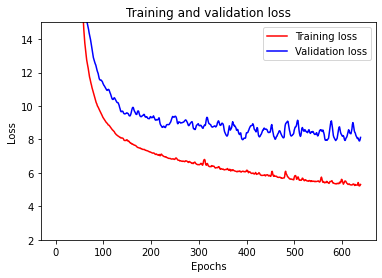

In [22]:
# Use the Boston Housing example to plot the validataion and training loss vs epochs
plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.ylim(2,15)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

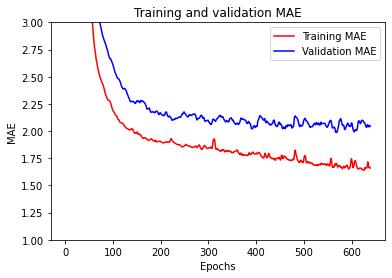

In [23]:
# Use the Boston Housing example to plot the validataion and training mean absolute error vs epochs
plt.plot(epochs, acc_values, 'r', label = 'Training MAE')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation MAE')
plt.ylim(1,3)
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [29]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(72, activation = 'relu', input_shape = (x_train.shape[1],)))
model.add(layers.Dense(18, activation = 'relu'))
model.add(layers.Dense(1))

model.compile(optimizer = 'adam', loss  = 'mse', metrics=['mae'])

training_data, valid_data, training_target, valid_target = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)

history = model.fit(training_data, training_target,
                   epochs = 568, # I used 568 looking at the table. 568th epoch gave the best validation. Could be a coincidence though.
                   batch_size=81,
                   validation_data=(valid_data, valid_target),
                   verbose = 0)

results = model.evaluate(x_test, y_test)
print(results)
print(model.metrics_names)

79/79 [==============================] - 0s 154us/sample - loss: 4.7514 - mae: 1.6036
[4.75140112261229, 1.6036018]
['loss', 'mae']


In [30]:
hist = pd.DataFrame(history.history)
new_df = hist.sort_values(by=['val_mae'])
new_df.head(10)

,loss,mae,val_loss,val_mae
552,5.915562,1.677349,5.646641,1.815652
511,6.020625,1.687120,5.661199,1.819398
512,6.026568,1.687062,5.633977,1.820941
553,5.829824,1.664223,5.637846,1.823419
510,5.968524,1.679668,5.695345,1.825104
562,5.899025,1.668814,5.725152,1.829792
563,5.868933,1.662520,5.684273,1.831213
513,5.969800,1.685580,5.669844,1.836457
509,5.954592,1.683358,5.792457,1.837694
564,5.822189,1.661519,5.701087,1.842056


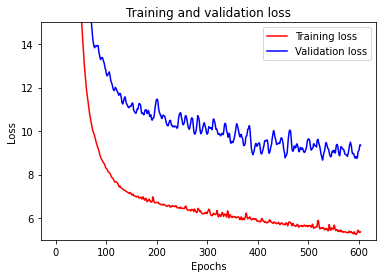

In [31]:
# Use the Boston Housing example to plot the validataion and training loss vs epochs
plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.ylim(5,15)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

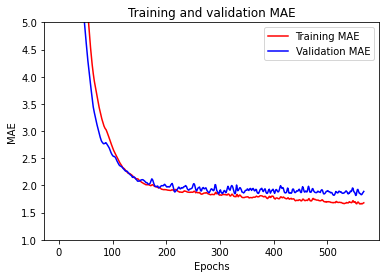

In [32]:
history_dict = history.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['mae']
val_acc_values = hist['val_mae']
epochs = range(1, len(hist['mae']) + 1)



plt.plot(epochs, acc_values, 'r', label = 'Training MAE')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation MAE')
plt.ylim(1,5)
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [0]:
# Clear your session using this command: backend.clear_session() 
# Build a new model and try to get the RME below 1.75
# Things to try: more hidden layers and hiddent units, activation types, epochs, batch size, and validation_split.
# Try as many models as you like.  Be sure to clear the session each time.  backend.clear_session() 